In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  importer
from quetzal.model import stepmodel

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

C:\Users\qchasserieau\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


SQLalchemy is not installed. No support for SQL output.


In [2]:
training_folder = '../../'
input_folder = training_folder + r'/inputs/'

# rail

In [3]:
lines = gpd.read_file(input_folder+'lines.geojson').set_index('route_name')
#lines['geometry'] = lines['geometry'].apply(lambda g: g[0])

<AxesSubplot:>

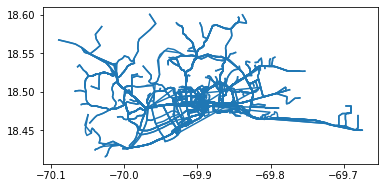

In [4]:
lines.plot()

In [5]:
links, nodes = importer.from_lines(lines, add_return=False)

In [6]:
links = pd.merge(links, lines[['route_type']], left_on='trip_id', right_index=True) 

In [7]:
links.head()

,a,b,link_sequence,direction_id,geometry,line,trip_id,route_id,route_type
0,0,1,0,0,"LINESTRING (-69.901411 18.549246, -69.90093299...",LM01_1,LM01_1,LM01_1,1
1,1,2,1,0,"LINESTRING (-69.90093299999999 18.546629, -69....",LM01_1,LM01_1,LM01_1,1
2,2,3,2,0,"LINESTRING (-69.90447399999999 18.540005, -69....",LM01_1,LM01_1,LM01_1,1
3,3,4,3,0,"LINESTRING (-69.908511 18.529458, -69.916248 1...",LM01_1,LM01_1,LM01_1,1
4,4,5,4,0,"LINESTRING (-69.916248 18.525359, -69.91505600...",LM01_1,LM01_1,LM01_1,1


In [8]:
#links['route_type'] = 1
links['route_color'] = "#D22328" # rouge systra
sm = stepmodel.StepModel(epsg=4326, coordinates_unit='degree')
sm.links, sm.nodes = links, nodes

<AxesSubplot:>

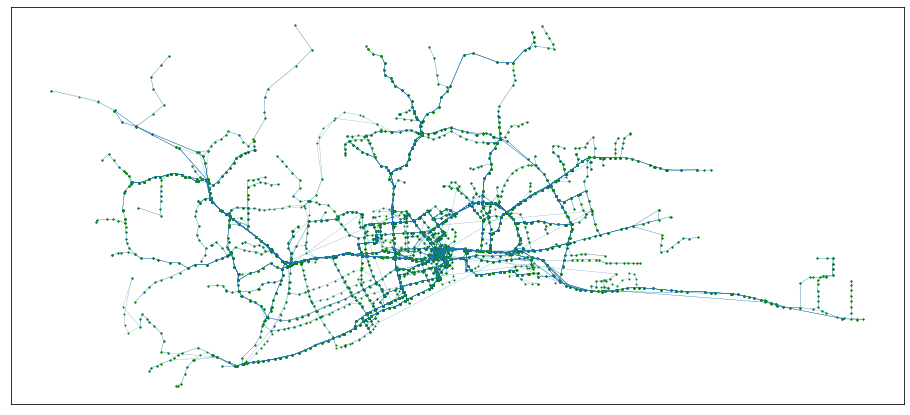

In [9]:
sm.plot(
    'links', linewidth=0.2, 
    ax=sm.plot('nodes', color='green', markersize=1, figsize=[16, 9])
)

In [10]:
sm.integrity_fix_collision()

can not add prefixes on table:  footpaths


In [11]:
sm.links['route_type'].value_counts()

32    7583
33    4937
31    1031
1       62
Name: route_type, dtype: int64

In [12]:
route_type_dict = {
        0:'tram',
        1:'subway',
        2:'rail',
        3:'bus',
        4:'ferry',
        5:'cable_car',
        6:'gondola',
        7:'funicular',
        31: 'bus',
        32: 'minibus',
        33: 'concho',
    }
sm.links['route_type'] = sm.links['route_type'].apply(lambda i: route_type_dict[i])

In [15]:
projected = sm.change_epsg(epsg=32619, coordinates_unit='meter')
import os
try: 
    os.mkdir(training_folder + r'model/preparation')
except FileExistsError:
    pass
projected.to_zip(training_folder + r'model/preparation/lines.zip')

jsons: 100%|███████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 31.88it/s]
